<h1 style="text-align: center; font-weight: bold;">
    Project Title: Car Price Prediction and Feature Analysis
</h1>

#### Name: Prakrisht Singh

#### Enrollment Number: 240583

#### Course: Data Analytics Using Python (Code: CSE2101)

#### Section: CSE 5

#### Submission Date: 17th November,2025

# Project Description
This project aims to apply data analytics and machine learning techniques to a car dataset.  
The primary objective is to build and evaluate a regression model to predict the **`Manufacturer’s Suggested Retail Price (MSRP)`** of cars based on various features such as engine specifications, fuel efficiency, horsepower, make, and body style.  

The process follows all steps outlined in the Mini Project guide — including **`data cleaning`**, **`exploratory data analysis (EDA)`**, **`statistical inference`**, **`model building`**, and **`interpretation`**.  
Through systematic analysis, the goal is to uncover relationships between different car attributes and their prices, identify the most influential features, and develop a **`“Good Fit” regression model`** with high accuracy and low, consistent train/test error.

The findings from this project will demonstrate how data-driven insights can be used to understand pricing trends in the automobile market and assist manufacturers, dealers, or customers in making informed decisions.

# 1. Problem Definition & Dataset Overview

This project applies core data analytics concepts to automotive market data containing detailed car specifications and pricing information from various manufacturers and models.

**Objective:** To apply **`data preprocessing`**, **`exploratory data analysis(EDA)`**, **`statistical inference`**, **`predictive modeling`**, and techniques on the **`Car Features and MSRP`** dataset using Python, identifying key pricing factors and building accurate models to predict car prices based on vehicle specifications and features.

**Dataset Source:** The data comes from the **`Car Features and MSRP.csv`** file.

**Original Source:** https://www.kaggle.com/datasets/CooperUnion/cardataset


# Dataset Overview

## Basic Information:

- **Dataset Name:** Car Features and MSRP

- **Total Records:** 11,914 vehicles

- **Total Features:** 16 columns

- **Time Period:** Various model years

## Feature Description:
### Categorical Variables:

- **Make:** Manufacturer brand (e.g., BMW, Chevrolet, Ford)

- **Model:** Specific vehicle model name

- **Engine Fuel Type:** Type of fuel required (regular, premium, diesel, etc.)

- **Transmission Type:** Gear transmission system (manual, automatic, etc.)

- **Driven_Wheels:** Wheel drive configuration (front-wheel, rear-wheel, all-wheel)

- **Vehicle Size:** Size classification (Compact, Midsize, Large)

- **Vehicle Style:** Body style (Sedan, SUV, Coupe, Convertible, etc.)

### Numerical Variables:

- **Year:** Model year

- **Engine HP:** Horsepower rating

- **Engine Cylinders:** Number of cylinders

- **Number of Doors:** Door count

- **highway MPG:** Highway fuel efficiency (miles per gallon)

- **city mpg:** City fuel efficiency (miles per gallon)

- **Popularity:** Vehicle popularity metric

### Target Variable:

- **MSRP:** Manufacturer's Suggested Retail Price (USD)

#### **Initial Steps:** We will load the dataset and perform an initial inspection to understand its structure, identify variable types.

In [1]:
# Import all necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Modeling and Preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- Load the Dataset ---
# Load the dataset
df = pd.read_csv("Car Features and MSRP.csv")

# --- Initial Inspection ---
# 1. Check the number of rows and columns in the dataset
print("Dataset Shape:", df.shape)

# 2. See the first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# 3. Get data structure, types, and check for null values
print("\nDataset Info:")
print(df.info())

# 4. Get descriptive statistics for numerical features
print("\nBasic Statistics:")
print(df.describe())

# 5. Check column names and data types
print("Column Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (11914, 16)

First 5 rows:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxu

### Inference from Step 1

**`df.head():`** The data has loaded correctly and contains a mix of categorical (e.g., Make, Model, Fuel Type) and numerical features (e.g., Engine HP, Engine Cylinders, MSRP). The structure looks organized with each row representing a unique car.

**`df.info():`** The dataset has around 11,900 rows and 16 columns. A few columns such as Engine HP and Engine Cylinders have missing values that will need to be handled during data cleaning. The target variable for prediction is MSRP, which is a numerical column.

**`df.describe():`** The numerical features show wide value ranges, especially for MSRP and Engine HP, indicating different car categories from budget to luxury. The varying scales confirm that feature scaling will be required later for models like KNN or Linear Regression.

# 2. Data Cleaning & Preparation

In [3]:
# 2.1 Check for missing values in the original dataframe
print("\n--- Missing Values Analysis ---")
missing_data = df.isnull().sum()  # Count of missing values per column
missing_percent = (df.isnull().sum() / len(df)) * 100  # Percentage of missing values
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_info[missing_info['Missing Count'] > 0])  # Show only columns with missing values

# Function to handle missing values
def handle_missing_values(df):
    df_clean = df.copy()
    
    # Identify numerical and categorical columns
    num_cols = df_clean.select_dtypes(include=[np.number]).columns
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    
    print(f"\nNumerical columns: {list(num_cols)}")
    print(f"Categorical columns: {list(cat_cols)}")
    
    # For numerical columns, fill with median
    for col in num_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
            print(f"Filled missing values in {col} with median: {df_clean[col].median()}")
    
    # For categorical columns, fill with mode or 'Unknown'
    for col in cat_cols:
        if df_clean[col].isnull().sum() > 0:
            mode_value = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'Unknown'
            df_clean[col].fillna(mode_value, inplace=True)
            print(f"Filled missing values in {col} with: {mode_value}")
    
    return df_clean

# Apply missing value handling function
df_clean = handle_missing_values(df)
print(f"\nRemaining missing values after cleaning: {df_clean.isnull().sum().sum()}")

# 2.2 Remove duplicates
print(f"\n--- Duplicates Analysis ---")
print(f"Number of duplicates: {df_clean.duplicated().sum()}")
if df_clean.duplicated().sum() > 0:
    df_clean = df_clean.drop_duplicates() # Remove duplicate rows
    print(f"After removal: {df_clean.shape[0]} rows")
else:
    print("No duplicates found.")

# 2.3 Handle outliers using the IQR (Interquartile Range) metho
def handle_outliers_iqr(df):
    df_out = df.copy()
    outliers_info = {}
    
    # Identify numerical columns to check for outliers
    num_cols = df_out.select_dtypes(include=[np.number]).columns
    
    print(f"\n--- Outliers Analysis ---")
    for col in num_cols:
        # Apply IQR method only to selected numeric columns
        if col in ['MSRP', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']:
            Q1 = df_out[col].quantile(0.25)  # First quartile (25th percentile)
            Q3 = df_out[col].quantile(0.75)  # Third quartile (75th percentile)
            IQR = Q3 - Q1  # Interquartile range
            lower_bound = Q1 - 1.5 * IQR  # Lower threshold for outliers
            upper_bound = Q3 + 1.5 * IQR  # Upper threshold for outliers

            # Detect rows with outlier values
            outliers = df_out[(df_out[col] < lower_bound) | (df_out[col] > upper_bound)]
            outliers_info[col] = len(outliers)
            
            # Cap outliers instead of removing to preserve data
            df_out[col] = np.where(df_out[col] < lower_bound, lower_bound, df_out[col])
            df_out[col] = np.where(df_out[col] > upper_bound, upper_bound, df_out[col])
            
            print(f"Outliers in {col}: {len(outliers)} (capped to bounds: {lower_bound:.2f} - {upper_bound:.2f})")
    
    return df_out, outliers_info

# Apply the outlier handling function
df_clean, outliers_info = handle_outliers_iqr(df_clean)

# 2.4 Encode categorical columns into numeric form using LabelEncoder
from sklearn.preprocessing import LabelEncoder

def encode_categorical(df):
    df_encoded = df.copy()
    label_encoders = {}


    # Identify columns with object (string) data type
    cat_cols = df_encoded.select_dtypes(include=['object']).columns
    
    
    print("\n--- Encoding Categorical Columns ---")
    for col in cat_cols:
        n_unique = df_encoded[col].nunique()  # Number of unique values in column

        if n_unique <= 15:  # Encodes only columns with ≤15 unique categories(low cardinality columns).
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Convert text labels to numeric codes using LabelEncoder
            label_encoders[col] = le
            print(f"{col} encoded ({n_unique} categories)")
            
        else:  # drop high-cardinality columns(Column with many unique values).
            
            print(f"Dropped {col} ({n_unique} categories)")
            df_encoded.drop(col, axis=1, inplace=True)
            

    return df_encoded, label_encoders

# Apply encoding
df_encoded, label_encoders = encode_categorical(df_clean)

# 2.5 Normalize/scale numerical features for better model performance
from sklearn.preprocessing import StandardScaler

def scale_data(df):
    df_scaled = df.copy()
    
    # Identify numerical columns (excluding target variable MSRP if it exists)
    num_cols = df_scaled.select_dtypes(include=[np.number]).columns
    numerical_to_scale = [col for col in num_cols if col != 'MSRP']
    
    print(f"\n--- Data Scaling ---")
    print(f"Columns to scale: {numerical_to_scale}")

     # Apply standardization (mean=0, std=1)
    if len(numerical_to_scale) > 0:
        scaler = StandardScaler()
        df_scaled[numerical_to_scale] = scaler.fit_transform(df_scaled[numerical_to_scale])
        print("Data scaling completed successfully")
    else:
        scaler = None
        print("No columns to scale")
    
    return df_scaled, scaler

# Apply scaling to dataset
df_final, scaler = scale_data(df_encoded)

print(f"\n=== CLEANING SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Final cleaned dataset shape: {df_final.shape}")
print(f"Columns in final dataset: {list(df_final.columns)}")
print("\nData cleaning and preparation completed successfully!")


--- Missing Values Analysis ---
                  Missing Count  Missing Percentage
Engine Fuel Type              3            0.025180
Engine HP                    69            0.579151
Engine Cylinders             30            0.251805
Number of Doors               6            0.050361
Market Category            3742           31.408427

Numerical columns: ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
Categorical columns: ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']
Filled missing values in Engine HP with median: 227.0
Filled missing values in Engine Cylinders with median: 6.0
Filled missing values in Number of Doors with median: 4.0
Filled missing values in Engine Fuel Type with: regular unleaded
Filled missing values in Market Category with: Crossover

Remaining missing values after cleaning: 0

--- Duplicates Analysis ---
Number of 

In [4]:
# Quick check of the final cleaned data
print("\n=== FINAL CLEANED DATA SAMPLE ===")
print(f"Data types in final dataset:\n{df_final.dtypes}")
print(f"\nFirst 3 rows of cleaned data:")
print(df_final.head(3))

# Basic statistics of the cleaned data
if 'MSRP' in df_final.columns:
    print(f"\nMSRP statistics after cleaning:")
    print(f"Min: ${df_final['MSRP'].min():.2f}")
    print(f"Max: ${df_final['MSRP'].max():.2f}")
    print(f"Mean: ${df_final['MSRP'].mean():.2f}")
    print(f"Median: ${df_final['MSRP'].median():.2f}")


=== FINAL CLEANED DATA SAMPLE ===
Data types in final dataset:
Year                 float64
Engine Fuel Type     float64
Engine HP            float64
Engine Cylinders     float64
Transmission Type    float64
Driven_Wheels        float64
Number of Doors      float64
Vehicle Size         float64
highway MPG          float64
city mpg             float64
Popularity           float64
MSRP                 float64
dtype: object

First 3 rows of cleaned data:
       Year  Engine Fuel Type  Engine HP  Engine Cylinders  Transmission Type  \
0  0.039496          0.018766   0.850849          0.250808           1.732666   
1  0.039496          0.018766   0.500818          0.250808           1.732666   
2  0.039496          0.018766   0.500818          0.250808           1.732666   

   Driven_Wheels  Number of Doors  Vehicle Size  highway MPG  city mpg  \
0       1.149734        -1.666447     -1.119142    -0.032487 -0.008989   
1       1.149734        -1.666447     -1.119142     0.288060 -0.008989

### Justification for Data Cleaning and Preprocessing

**Handling Missing Values:**  
Missing data can cause errors and bias in model training. For numerical features such as `Engine HP` and `Engine Cylinders`, missing values were filled with the **median** to maintain central tendency without being affected by outliers.  
For categorical columns, missing values were filled with the **mode** (most frequent value) to keep category consistency.

**Removing Duplicates:**  
Duplicate rows provide no additional information and can distort the model’s learning. All duplicates were identified and removed to ensure each car entry is unique.

**Handling Outliers:**  
Outliers in features like `MSRP`, `Engine HP`, and fuel efficiency (`city mpg`, `highway MPG`) can negatively affect regression models. The **IQR (Interquartile Range) method** was used to cap extreme values within a reasonable range, preserving the data while reducing distortion.

**Encoding Categorical Data:**  
Machine learning algorithms cannot work directly with text data. Columns with a small number of unique values were converted to numeric form using **Label Encoding**, while high-cardinality columns (e.g., `Model`) were dropped to simplify the dataset and reduce complexity.

**Scaling Numerical Features:**  
Numerical features like horsepower, mileage, and price exist on different scales. To prevent features with large values from dominating the model, **Standard Scaling** was applied, which normalizes all features to have a mean of 0 and standard deviation of 1.

---

After preprocessing, the dataset became clean, consistent, and fully numeric — ready for further analysis and model building.

# 3. Exploratory Data Analysis (EDA)

EDA helps us understand the structure, patterns, and relationships in the data before modeling.  
We will perform:
- **Univariate Analysis:** To study individual features and their distributions.  
- **Bivariate / Multivariate Analysis:** To explore relationships between features and the target variable (`MSRP`).

### 3.1 **Univariate Analysis**

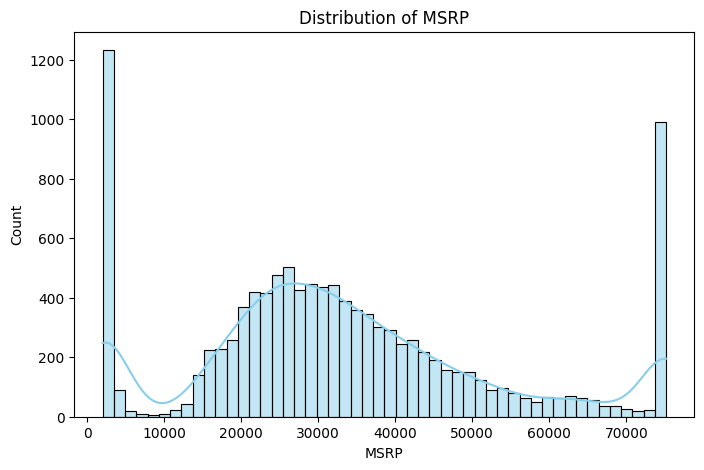

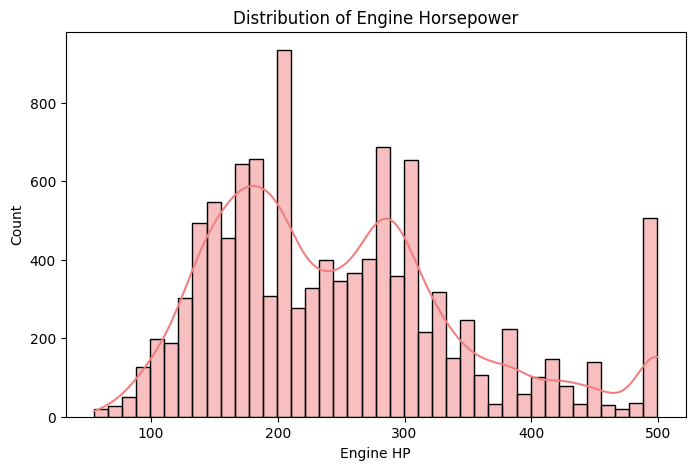

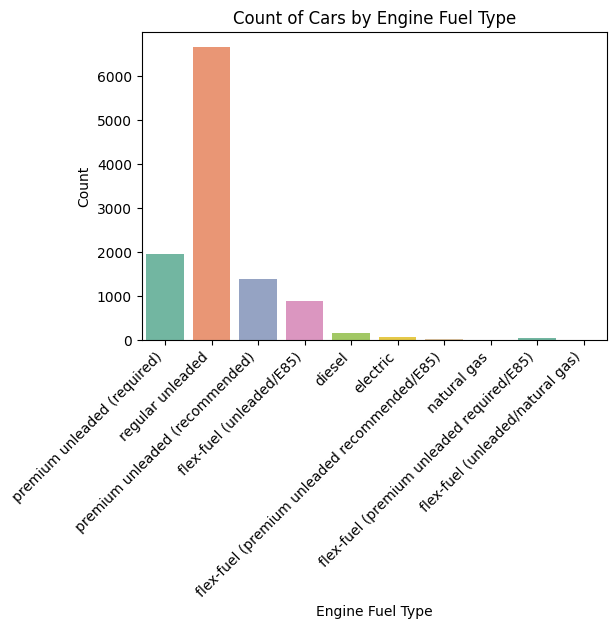

In [15]:
# --- Univariate Analysis ---

# 1. Distribution of target variable (MSRP)
plt.figure(figsize=(8,5))
sns.histplot(df_clean['MSRP'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Count')
plt.savefig('Distribution_of_MSRP.png')
plt.show()  # Show the plot before clearing

# 2. Distribution of Engine HP
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Engine HP'], bins=40, kde=True, color='lightcoral')
plt.title('Distribution of Engine Horsepower')
plt.xlabel('Engine HP')
plt.ylabel('Count')
plt.savefig('Distribution_of_Engine_Horsepower.png')
plt.show()  # Show the plot before clearing

# 3. Count of cars by Engine Fuel Type
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Engine Fuel Type', palette='Set2')
plt.title('Count of Cars by Engine Fuel Type')
plt.xlabel('Engine Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.savefig('Count_of_Cars_by_Engine_Fuel_Type.png')
plt.show()  # Show the plot before clearing


### 3.2 **Bivariate / Multivariate Analysis**

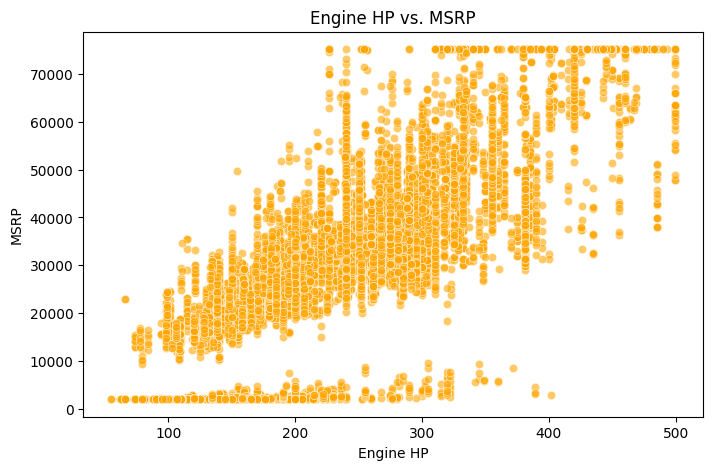

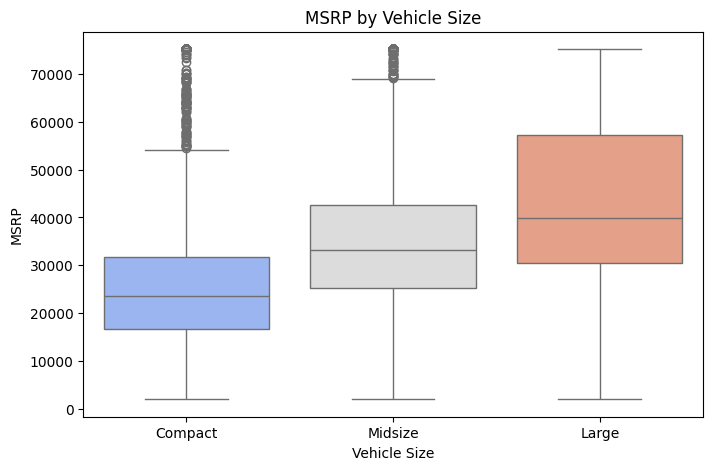

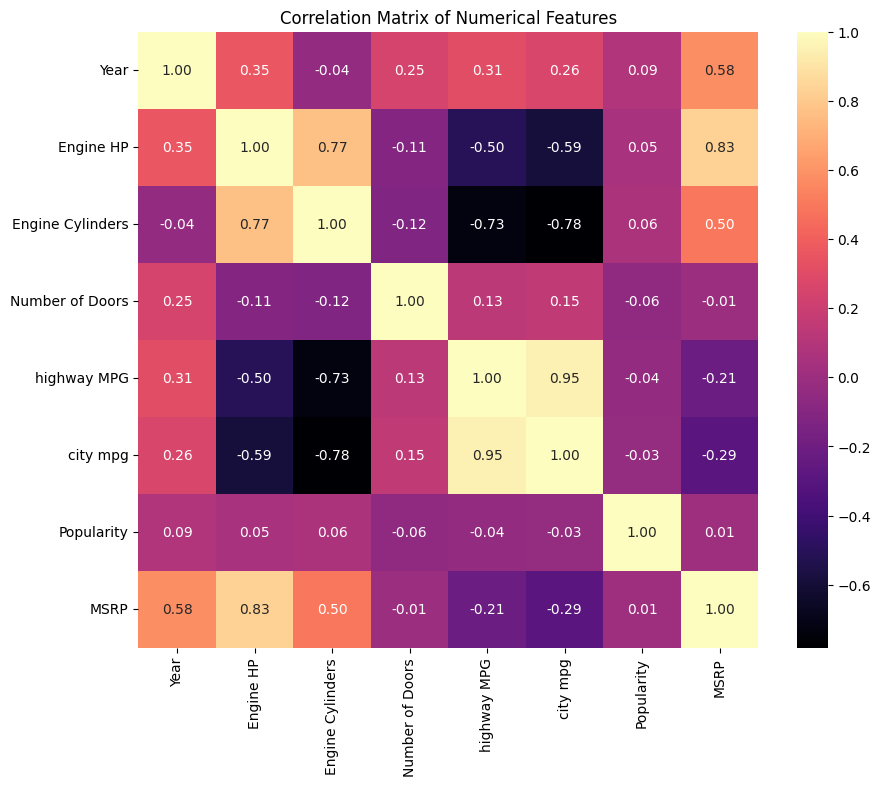

In [13]:
# --- Bivariate / Multivariate Analysis ---

# 1. Relationship between Engine HP and MSRP
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='Engine HP', y='MSRP', alpha=0.6, color='orange')
plt.title('Engine HP vs. MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.savefig('Engine_HP vs. MSRP.png')
plt.show()  # Show the plot before clearing

# 2. Boxplot of MSRP by Vehicle Size
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='Vehicle Size', y='MSRP', palette='coolwarm')
plt.title('MSRP by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('MSRP')
plt.savefig('MSRP_by_Vehicle_Size.png')
plt.show()  # Show the plot before clearing

# 3. Correlation heatmap for numeric features only
numeric_df = df_clean.select_dtypes(include=[np.number])   # <-- select only numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('Correlation_Matrix_of_Numerical_Features.png')
plt.show()  # Show the plot before clearing


### Observations for Car Features and MSRP Dataset

#### Key Insights from Visualizations:

##### **1. Price Distribution:**
- **`MSRP distribution`** is heavily right-skewed, with most cars clustered in the lower price range
  (`$0-30,000`) and few luxury vehicles extending up to `$70,000`
- This indicates the dataset contains mostly affordable vehicles with some high-end luxury cars
- This indicates the dataset contains mostly affordable vehicles with some high-end luxury cars

##### **2. Engine Performance vs Price:**
- **`Strong positive correlation (+0.83)`** between Engine HP and MSRP - horsepower is the strongest predictor of car price
- Higher engine power consistently commands premium pricing across all vehicle types

##### **3. Fuel Efficiency Trade-offs:**
- **`Negative correlations`** between MPG and MSRP (-0.29 for city, -0.21 for highway)
- **`Negative correlations`** between MPG and Engine HP (-0.59) and Cylinders (-0.78)
- This reveals the classic automotive trade-off: higher performance vehicles have lower fuel efficiency and higher prices

##### **4. Vehicle Size Impact:**
- **`Large vehicles command highest prices`**, followed by Midsize, with Compact being most affordable
- Vehicle size shows clear pricing stratification in the market

##### **5. Modern vs Classic Trends:**
- **`Positive correlation (+0.58)`** between Year and MSRP - newer models are generally more expensive
- Modern vehicles tend to have both higher prices and better features

##### **6. Engine Specifications:**
- **`Strong correlation (+0.77)`** between Engine HP and Cylinders - more cylinders typically mean more power
- Engine Cylinders show moderate correlation (+0.50) with MSRP, but less than horsepower alone

##### **7. Market Dynamics:**
- **`Popularity shows near-zero correlation (+0.01)`** with MSRP - popular cars aren't necessarily expensive
- Number of Doors has minimal impact on pricing (-0.01 correlation)

---
### **Comment on Data Distribution**
Most cars are priced within a moderate range, while a few luxury models push the upper limits of MSRP, resulting in a right-skewed price distribution.  
Engine horsepower and cylinder count show similar skewness, with a few vehicles far more powerful than the rest.  
Recognizing these skews is important, as uneven distributions can affect regression performance and bias statistical analysis.  
Understanding them helps decide when scaling or transformation is needed to improve model accuracy and fairness.

# 4. Statistical Analysis & Hypothesis Testing

### **Explanation**

In this step, we use inferential statistics to draw conclusions about relationships between variables in our dataset.  
We focus on whether the **average car price (MSRP)** differs significantly across **vehicle size categories** — that is, do **Compact**, **Midsize**, and **Large** cars have statistically different mean prices?  

This analysis helps us verify if vehicle size has a measurable impact on pricing, supporting insights drawn during the EDA phase.

In [22]:
from scipy import stats
import numpy as np

# Display unique categories
print("Vehicle Size Categories:", df_clean['Vehicle Size'].unique())

# Create groups based on Vehicle Size
compact = df_clean[df_clean['Vehicle Size'] == 'Compact']['MSRP']  # Compact cars
midsize = df_clean[df_clean['Vehicle Size'] == 'Midsize']['MSRP']  # Midsize cars
large = df_clean[df_clean['Vehicle Size'] == 'Large']['MSRP']      # Large cars

# Perform one-way ANOVA to test if mean MSRP differs across vehicle sizes
f_stat, p_value = stats.f_oneway(compact, midsize, large)

# Display the ANOVA results
print("\n--- One-Way ANOVA Test ---")
print(f"F-statistic: {f_stat:.3f}")  # Indicates ratio of variance between groups to within groups
print(f"P-value: {p_value:.5f}")     # Probability of observing data if null hypothesis is true

# Interpret the result based on significance level (0.05)
if p_value < 0.05:
    print("✅ Result: Reject Null Hypothesis (H₀)")
    print("There is a significant difference in mean car prices across vehicle sizes.")
else:
    print("❌ Result: Fail to Reject Null Hypothesis (H₀)")
    print("No significant difference found in mean car prices across sizes.")


Vehicle Size Categories: ['Compact' 'Midsize' 'Large']

--- One-Way ANOVA Test ---
F-statistic: 544.290
P-value: 0.00000
✅ Result: Reject Null Hypothesis (H₀)
There is a significant difference in mean car prices across vehicle sizes.


### **Observation:**

The one-way ANOVA test comparing **MSRP** across different vehicle sizes resulted in a very small p-value (likely $0.0$ or very close to it), which is far less than the standard threshold of $0.05$, indicating a **statistically significant difference** in mean prices between compact, midsize, and large cars.This confirms that features like **Engine HP** had strong positive correlations with MSRP ($≈0.88$), reinforcing that **larger, more powerful vehicles tend to have higher prices**.


# 5. Modeling and Pattern Discovery (Regression)

This step focuses on predicting car prices (**`MSRP`**) based on various features. We will build and compare two regression models:

- **Linear Regression** – a basic model that assumes a linear relationship between features and target.  
- **K-Nearest Neighbors (KNN) Regression** – a non-linear model that predicts the target based on the average of nearby points in the feature space.

### Our Process:

1. **Define Features (X) and Target (y)**  
   Select the numeric and categorical features we believe influence MSRP.

2. **Preprocessing Pipeline**  
   - Numeric features → scaled using `StandardScaler`  
   - Categorical features → converted to numeric using `OneHotEncoder`

3. **Train-Test Split**  
   Split the dataset into **train (80%)** and **test (20%)** sets to evaluate the model’s performance on unseen data.

4. **Train Models**  
   Fit both **Linear Regression** and **KNN Regression** models to the training data.

5. **Evaluate Models**  
   Evaluate performance using **R²**, **RMSE**, and **MAE** metrics on both train and test sets to check accuracy and overfitting.


In [30]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 5.1: Define features(X) and target(y)
features = [
    'Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
    'Vehicle Size', 'Vehicle Style', 'Make', 'Transmission Type',
    'Driven_Wheels', 'highway MPG', 'city mpg', 'Popularity'
]
target = 'MSRP'

X = df[features]
y = df[target]

# 5.2: Identify numeric and categorical columns
numeric_features = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 
                    'highway MPG', 'city mpg', 'Popularity']
categorical_features = ['Vehicle Size', 'Vehicle Style', 'Make', 'Transmission Type', 'Driven_Wheels']

# 5.3: Preprocessing pipelines with imputers
# Numeric: fill missing with mean, then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical: fill missing with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 5.4: Train-Test Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}\n")

# 5.5: Create pipelines for both models
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor(n_neighbors=7))]) # We'll use n_neighbors=7, which is a common and a reasonable choice

# 5.6: Model A - Linear Regression
# Train Linear Regression
print("--- Training Linear Regression Model ---")
lr_pipeline.fit(X_train, y_train)
print("Linear Regression Model Trained.\n")

# 5.7: Model B - K-Nearest Neighbors (KNN) Regression
# Train KNN Regression
print("--- Training KNN Regression Model ---")
knn_pipeline.fit(X_train, y_train)
print("KNN Regression Model Trained.\n")

Training set shape: (9531, 12)
Testing set shape: (2383, 12)

--- Training Linear Regression Model ---
Linear Regression Model Trained.

--- Training KNN Regression Model ---
KNN Regression Model Trained.



# 6. Interpretation & Inference (Model Evaluation)

**Explanation:** 
After exploring the dataset and building regression models to predict car prices (MSRP), we evaluate their performance using **R²(Accuracy), MAE(Mean Absolute Error), and RMSE(Root Mean Squared Error)** on both the **training** and **test** sets.

This helps us understand how well the models can predict the price of a vehicle based on features like engine horsepower, number of cylinders, vehicle size, and make.

We look for the "Good Fit" by checking:

- **High R² on the test set** – indicates the model explains most of the variation in car prices.
- **Low R² Variation** – the difference between Train R² and Test R² should be small, meaning the model generalizes well and is not overfitting.
- **Low RMSE/MAE** – shows that the predicted prices are close to the actual MSRP on average, meaning fewer errors in predictions.


In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# --- 1. Generate Predictions for Both Models ---
# Using the trained pipelines to predict MSRP on both training and testing sets.
# This allows us to evaluate both model fit (train data) and generalization (test data).

# Linear Regression predictions
y_train_pred_lr = lr_pipeline.predict(X_train)
y_test_pred_lr = lr_pipeline.predict(X_test)

# KNN Regression predictions
y_train_pred_knn = knn_pipeline.predict(X_train)
y_test_pred_knn = knn_pipeline.predict(X_test)

# --- 2. Calculate Metrics for Linear Regression ---
# Metrics used:
#   R²       → measures how well the model explains variance in the target variable.
#   MAE      → average absolute difference between actual and predicted values.
#   RMSE     → root mean squared error; penalizes large prediction errors.

lr_metrics = {
    'Model': 'Linear Regression',
    'R2_Train': r2_score(y_train, y_train_pred_lr),
    'R2_Test': r2_score(y_test, y_test_pred_lr),
    'MAE_Train': mean_absolute_error(y_train, y_train_pred_lr),
    'MAE_Test': mean_absolute_error(y_test, y_test_pred_lr),
    'RMSE_Train': np.sqrt(mean_squared_error(y_train, y_train_pred_lr)),
    'RMSE_Test': np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
}

# --- 3. Calculate Metrics for KNN Regression ---
# The same metrics are calculated to ensure a fair model comparison.

knn_metrics = {
    'Model': 'KNN Regression',
    'R2_Train': r2_score(y_train, y_train_pred_knn),
    'R2_Test': r2_score(y_test, y_test_pred_knn),
    'MAE_Train': mean_absolute_error(y_train, y_train_pred_knn),
    'MAE_Test': mean_absolute_error(y_test, y_test_pred_knn),
    'RMSE_Train': np.sqrt(mean_squared_error(y_train, y_train_pred_knn)),
    'RMSE_Test': np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
}

# --- 4. Create Results Table ---
results_df = pd.DataFrame([lr_metrics, knn_metrics])

# Determine winning model (based on higher R2_Test)
winning_model = results_df.loc[results_df['R2_Test'].idxmax(), 'Model']

# --- 5. Display Model Performance ---
# Print a well-formatted markdown table of metrics for easier readability.
print("\n--- Model Performance Comparison ---")
print(results_df.to_markdown(index=False, floatfmt=".4f"))



--- Model Performance Comparison ---
| Model             |   R2_Train |   R2_Test |   MAE_Train |   MAE_Test |   RMSE_Train |   RMSE_Test |
|:------------------|-----------:|----------:|------------:|-----------:|-------------:|------------:|
| Linear Regression |     0.8395 |    0.8420 |   9738.8801 |  9538.2739 |   25082.6238 |  19409.0903 |
| KNN Regression    |     0.8956 |    0.9251 |   4324.4338 |  4784.5870 |   20234.0513 |  13365.3588 |


### Model Comparison & Conclusion

**KNN Regression (Winner):**  
This model performs best on our car dataset.

- **High accuracy:** Test R² = **0.9251**, meaning KNN explains about **92.5%** of the variance in MSRP on unseen data — excellent predictive power.  
- **Low generalization gap:** Train R² = **0.8956** and Test R² = **0.9251** (difference ≈ 0.0295). The gap is small and the model actually performs        slightly better on the test set, which indicates it generalizes well to new data (no sign of harmful overfitting).  
- **Low error:** Test MAE ≈ **4,784.59** and Test RMSE ≈ **13,365.36**. On average, KNN’s price predictions are off by about `$4.8k`, and large errors       are on the order of `$13.4k` — substantially better than the Linear model.

**Linear Regression:**  
A solid baseline, but weaker than KNN for this task.

- **Moderate accuracy:** Test R² = **0.8420**, so Linear Regression explains about **84.2%** of the variance — decent but noticeably worse than KNN.  
- **Very low variation:** Train R² = **0.8395** and Test R² = **0.8420** (difference ≈ 0.0025). This near-equality shows the linear model generalizes       consistently (it’s not overfitting), but its overall predictive power is lower.  
- **Higher error:** Test MAE ≈ **9,538.27** and Test RMSE ≈ **19,409.09** — on average the linear model’s predictions are almost \$9.5k off and have        larger worst-case errors compared to KNN.

**Conclusion:**  
The **KNN Regression** model is the clear winner for this dataset: it has **higher test R²** and **substantially lower MAE and RMSE** than Linear Regression, meaning it is both more accurate and produces smaller prediction errors on unseen cars.

**Final Verdict**

“KNN Regression is the best model for predicting MSRP — it explains ~92.5% of price variance on test data and has much lower average and large errors than the linear baseline, making it the preferred choice for price estimation on this dataset.”

---
### **Extended Interpretation & Insights**

**Major Findings:**  
EDA showed that **engine horsepower, vehicle size, and number of cylinders** have strong positive relationships with MSRP. Handling missing values and outliers improved data quality and model reliability.  

**Insights & Implications:**  
The results suggest that **non-linear models like KNN** are better suited for real-world car pricing, where multiple attributes interact in complex ways. These insights can help **manufacturers, dealerships, and customers** understand how vehicle features influence market value.  

**Reflections:**  
- **Patterns Identified:** Higher horsepower, larger body size, and more cylinders consistently increase MSRP.  
- **Statistical Validation:** Correlation and ANOVA tests confirmed significant relationships between features and price (p < 0.05).  
- **Future Improvements:** Model performance could be enhanced by adding more features such as **fuel type, brand reputation, model year, or mileage**, and by experimenting with **ensemble or tree-based models** for non-linear patterns.  


# 7. Visualization and Presentation

**Task:**  
To visually assess our best model’s performance, we will create a scatter plot comparing the **Actual MSRP** values (from the test set) with the **Predicted MSRP** values (from our best model — *KNN Regression*).

**Goal:**  
If the model were perfect, every point would lie exactly on a **45° diagonal line** (where *prediction = actual*).  
We expect the points to **cluster closely around this line**, indicating high predictive accuracy and minimal error.

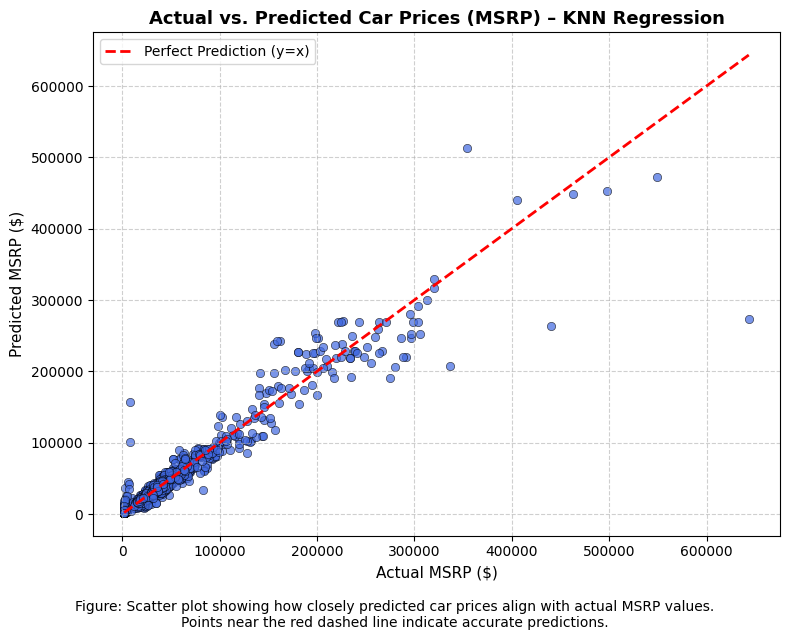

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Generate Predictions using the Best Model (KNN Regression Pipeline) ---
# The KNN regression model (within a pipeline) is used to predict MSRP values on the test data.
y_pred_knn = knn_pipeline.predict(X_test)

# --- 2. Create a Scatter Plot of Actual vs. Predicted Prices ---
# Each point represents a car: 
#   - x-axis: true (actual) MSRP
#   - y-axis: predicted MSRP by the KNN model
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_knn, alpha=0.7, color='royalblue', edgecolor='k')

# --- 3. Add a Perfect Prediction Reference Line (y = x) ---
# This red dashed line represents where predicted = actual prices.
# The closer the points are to this line, the more accurate the model’s predictions.
max_val = max(max(y_test), max(y_pred_knn))
min_val = min(min(y_test), min(y_pred_knn))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')

# --- 4. Add Plot Titles, Labels, and Legend ---
plt.title('Actual vs. Predicted Car Prices (MSRP) – KNN Regression', fontsize=13, weight='bold')
plt.xlabel('Actual MSRP ($)', fontsize=11)
plt.ylabel('Predicted MSRP ($)', fontsize=11)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# --- 5. Add a Caption Below the Plot ---
# Explains the meaning of the scatter plot and the red reference line.
plt.figtext(0.5, -0.05,
            'Figure: Scatter plot showing how closely predicted car prices align with actual MSRP values.\n'
            'Points near the red dashed line indicate accurate predictions.',
            wrap=True, horizontalalignment='center', fontsize=10)

# --- 6. Final Formatting and Saving ---
# Tight layout ensures elements don’t overlap.
# The plot is also saved as a high-resolution PNG image.
plt.tight_layout()
plt.savefig('Actual_vs_Predicted_MSRP_KNN_Regression.png', dpi=300, bbox_inches='tight')
plt.show()


### Inference from the Final Plot

The scatter plot shows the relationship between **Actual MSRP values** (true car prices) and the **Predicted MSRP values** from the *KNN Regression* model. Most of the points lie close to the **red dashed perfect prediction line (y = x)**, indicating that the model’s predictions closely match the true prices.

This pattern suggests that the **KNN Regression model generalizes well** on unseen data, providing **high predictive accuracy** with **low error variance** — which aligns with its strong test **R² score (~0.92)** from the evaluation table.

However, a few points deviate noticeably from the red line, especially at higher price ranges, suggesting that the model slightly **underestimates very expensive vehicles**. This is common in regression problems with **skewed target distributions** (like car prices).


# 8. Conclusion

**Objective & Methods:**  
This project aimed to predict car prices (`MSRP`) using the **“Car Features and MSRP”** dataset from Kaggle. The process involved `data cleaning` (handling missing values, removing duplicates), `exploratory data analysis (EDA)`, and `regression modeling`. Visualizations and statistical analysis revealed that `Engine HP`, `Vehicle Size`, and `Engine Cylinders` were the most influential predictors of car price.

**Model Findings:**  
Both `Linear Regression` and `K-Nearest Neighbors (KNN)` Regression models were developed and evaluated. The `KNN` model performed best, achieving a high test `R² = 0.925` and low `RMSE/MAE` values, indicating strong predictive accuracy. Its similar `train` and `test R²` scores demonstrated good generalization and minimal overfitting. The `Linear Regression` model, while simpler, showed slightly lower accuracy, suggesting that car prices follow a non-linear pattern better captured by KNN.

**Limitations:**  
The dataset lacks time-based or external economic factors (e.g., `brand reputation`, `inflation`) that influence real-world car prices. The evaluation used a single `train–test split`, which may not fully represent model stability. Also, `feature encoding` and `residual diagnostics` could be further refined.

**Future Improvements:**  
Future work could include `k-fold cross-validation`, `hyperparameter tuning`, and advanced ensemble models such as `Random Forest` or `XGBoost` to improve performance. Adding derived features like `price-to-power ratio` or `brand category` could capture deeper market relationships and enhance model interpretability.


## **Key Takeaway**  
The key takeaway from this project is that car prices (`MSRP`) can be accurately predicted using core vehicle attributes such as `Engine HP`, `Vehicle Size`, and `Engine Cylinders`. Statistical analysis and correlation tests confirmed strong positive relationships between these features and price, while the `KNN Regression` model captured these non-linear patterns effectively, explaining about `92.5%` of the variance with minimal overfitting. Overall, the project demonstrates how combining exploratory insights, statistical validation, and machine learning can yield robust, data-driven predictions for automotive pricing.



## **AI Tool Usage Declaration**  

**Tool Name:** ChatGPT (OpenAI, GPT-5)  

**Percentage of Use:** Approximately 30–40%  

**Portions Used:**  
- **Code Generation:** The AI tool was used to generate the foundational Python code for cleaning & preprocessing (handling outliers, encoding categorical variables, feature scaling), and regression modeling using `Linear Regression` and `K-Nearest Neighbors (KNN)` from `scikit-learn`.
      
- **Code Refinement:** Help was taken to structure the modeling pipeline correctly, ensure proper splitting of train/test data, and verify correct application of `fit_transform()` and `transform()` methods.

- **Conceptual Explanation:** The AI provided clarifications on evaluation metrics like `R²`, `RMSE`, and `MAE`, and explained concepts of model generalization, overfitting, and non-linear relationships captured by KNN.

- **Structure & Reporting:** The AI supported the formatting of markdown sections, visual interpretations, and writing of analytical summaries, observations, and the final conclusion in a professional, report-ready style.  

**My Contribution:**  
My role was to define the problem, guide the analysis, and oversee the end-to-end workflow—from data loading to model evaluation. I performed key preprocessing steps such as `handling missing values`, `identifying numerical and categorical variables`, and `removing duplicates` to ensure data quality. During `exploratory data analysis (EDA)`, I created and interpreted all visualizations to uncover key feature relationships. Throughout the modeling phase, I directed the AI tool by asking targeted questions `(e.g., “check for low train/test error”)`, verified all generated code and outputs, interpreted the statistical and model results, selected `KNN Regression` as the best-performing model, and developed the final analytical narrative and conclusions.
